# Pymaceuticals Inc.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
merge_df

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [3]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# desired output: array(['g989'], dtype=object)
duplicate_finding = merge_df[merge_df[["Mouse ID", "Timepoint"]].duplicated()]
print(duplicate_finding)
print(duplicate_finding.index)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  
Index([909, 911, 913, 915, 917], dtype='int64')


In [5]:
duplicate_finding

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
indexDupe = merge_df[(merge_df['Mouse ID'] == 'g989')].index

clean_df = merge_df.drop(merge_df.index[indexDupe])
clean_df = clean_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites",
                   "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]
clean_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     k403          0           45.000000                 0     Ramicane   
1     k403          5           38.825898                 0     Ramicane   
2     k403         10           35.014271                 1     Ramicane   
3     k403         15           34.223992                 1     Ramicane   
4     k403         20           32.997729                 1     Ramicane   

    Sex  Age_months  Weight (g)  
0  Male          21          16  
1  Male          21          16  
2  Male          21          16  
3  Male          21          16  
4  Male          21          16

In [69]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_df_ex = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean_vol = grouped_df_ex.mean().reset_index(name='Mean Tumor Volume')
median_vol = grouped_df_ex.median().reset_index(name='Median Tumor Volume')
var_vol = grouped_df_ex.var().reset_index(name='Tumor Volume Variance')
std_vol = grouped_df_ex.std().reset_index(name='Tumor Volume Std. Dev.')
sem_vol = grouped_df_ex.sem().reset_index(name='Tumor Volume Std. Err.')


summary_stats_df = pd.merge(mean_vol, median_vol, on="Drug Regimen")
summary_stats_df = pd.merge(summary_stats_df, var_vol, on="Drug Regimen")
summary_stats_df = pd.merge(summary_stats_df, std_vol, on="Drug Regimen")
summary_stats_df = pd.merge(summary_stats_df, sem_vol, on="Drug Regimen")
summary_stats_df = summary_stats_df.set_index("Drug Regimen")
summary_stats_df

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_stats_df = clean_df.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['median', 'mean', 'var', 'std', 'sem']
})

agg_summary_stats_df

Tumor Volume (mm3)                                          
                         median       mean        var       std       sem
Drug Regimen                                                             
Capomulin             41.557809  40.675741  24.947764  4.994774  0.329346
Ceftamin              51.776157  52.591172  39.290177  6.268188  0.469821
Infubinol             51.820584  52.884795  43.128684  6.567243  0.492236
Ketapril              53.698743  55.235638  68.553577  8.279709  0.603860
Naftisol              52.509285  54.331565  66.173479  8.134708  0.596466
Placebo               52.288934  54.033581  61.168083  7.821003  0.581331
Propriva              50.446266  52.320930  43.852013  6.622085  0.544332
Ramicane              40.673236  40.216745  23.486704  4.846308  0.320955
Stelasyn              52.431737  54.233149  59.450562  7.710419  0.573111
Zoniferol             51.818479  53.236507  48.533355  6.966589  0.516398

## Bar and Pie Charts

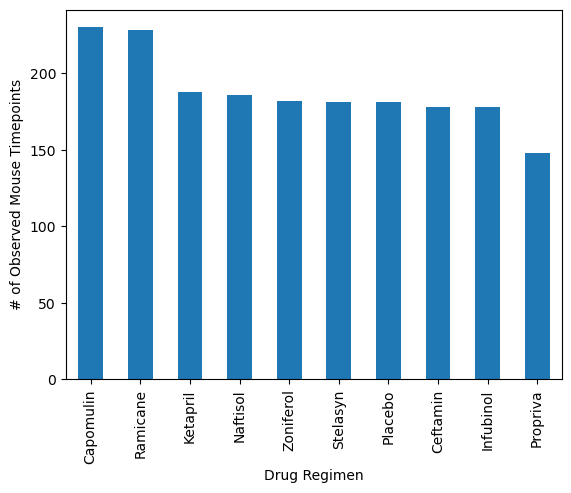

In [71]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_grouped = clean_df.groupby('Drug Regimen')

drugs_count = clean_grouped["Drug Regimen"].count()
drugs_count = drugs_count.sort_values(ascending=False)

drugs_graph_pandas = drugs_count.plot(kind='bar')
drugs_graph_pandas.set_xlabel("Drug Regimen")
drugs_graph_pandas.set_ylabel("# of Observed Mouse Timepoints")

plt.show()

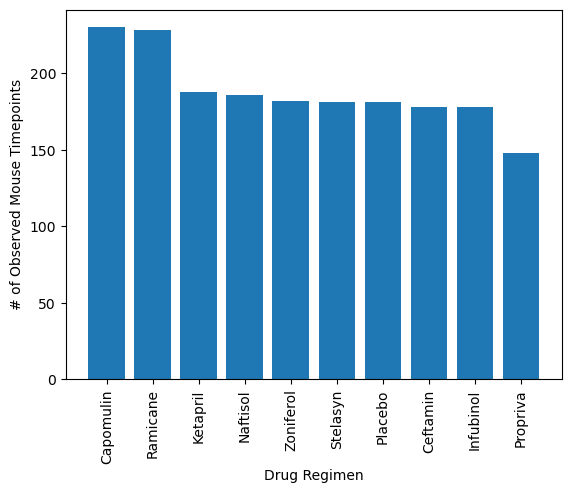

In [73]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs_count_df = pd.DataFrame(drugs_count)
drugs = drugs_count_df["Drug Regimen"]
drugs_count_df = drugs_count_df.rename(columns = {"Drug Regimen": "count"})
drugs_count_df = drugs_count_df.reset_index()
drugs = drugs_count_df["Drug Regimen"]
count = drugs_count_df["count"]

plt.bar(drugs, count)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

array([<Axes: ylabel='count'>], dtype=object)

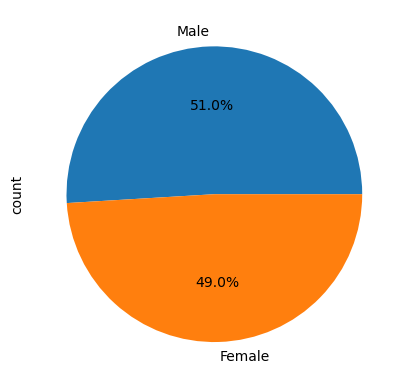

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_df.groupby("Sex").count().reset_index()
sex_df = sex_df.sort_values(by = "Sex", ascending=False)

sex_count = sex_df[["Sex", "Mouse ID"]]
sex_count = sex_count.rename(columns={"Mouse ID": "count"})

sex_count.plot.pie(y = "count", labels = sex_count["Sex"], autopct="%1.1f%%", subplots=True, legend=False)

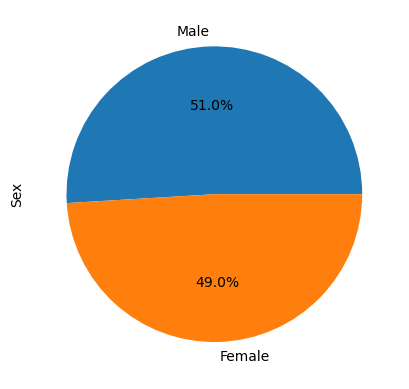

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count["count"], labels = sex_count["Sex"], autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the cleaned DataFrame to get the tumor volume at the last timepoint


tumor_vol_df = clean_df.sort_values(by="Timepoint", ascending=False)
tumor_vol_df = tumor_vol_df.groupby("Mouse ID").first().reset_index()
tumor_vol_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = tumor_vol_df.loc[tumor_vol_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


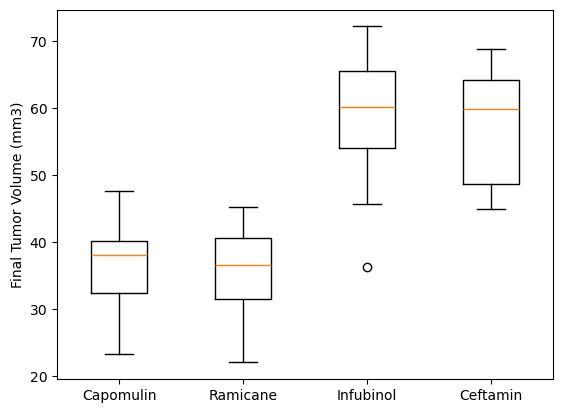

In [84]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
data = [tumor_vol_list[0], tumor_vol_list[1], tumor_vol_list[2], tumor_vol_list[3]]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(treatments)
ax.set(ylabel = "Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

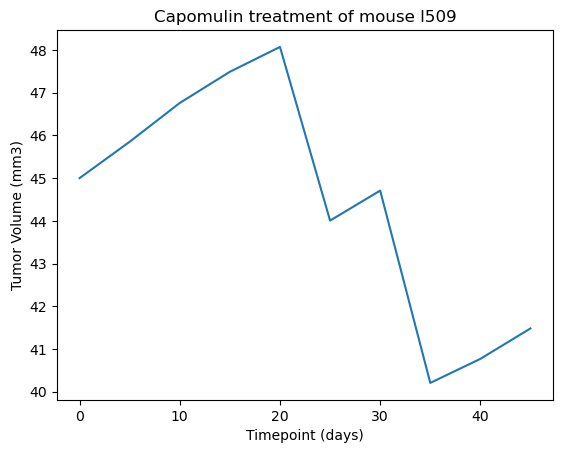

In [86]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = clean_df.loc[clean_df["Mouse ID"] == "l509"]
tumor = mouse["Tumor Volume (mm3)"]
timepoint = mouse["Timepoint"]

plt.plot(timepoint, tumor)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

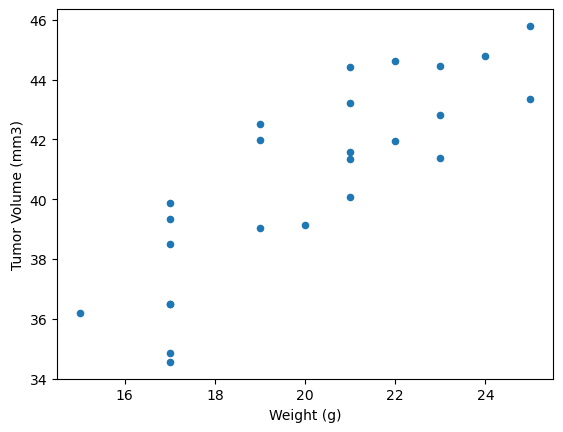

In [88]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

cap_summary_df = capomulin_df.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'first'
})

cap_summary_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


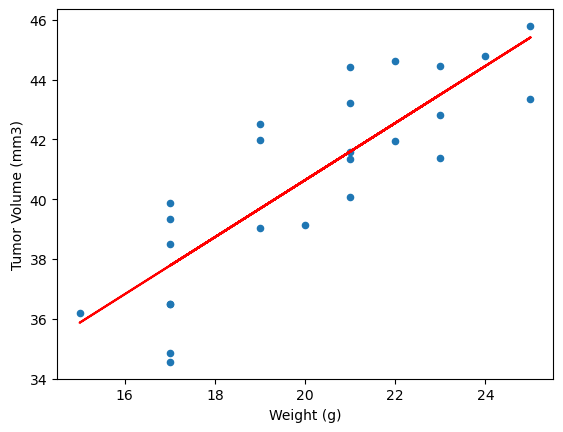

In [90]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats


weight = cap_summary_df["Weight (g)"]
tumor = cap_summary_df["Tumor Volume (mm3)"]
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(weight,tumor)[0],2)}") 


[slope, intercept, r, p, std_err] = stats.linregress(weight, tumor)
tumor_fit = slope * weight + intercept

cap_summary_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.plot(weight,tumor_fit,"r-")
plt.show()